<a href="https://colab.research.google.com/github/AnIsAsPe/ClasificadorClientesTelecom/blob/master/Notebooks/Churn_Telecom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El conjunto de Datos fue obtenido de Kaggle [Telecom Churn Dataset](https://www.kaggle.com/datasets/mnassrib/telecom-churn-datasets?datasetId=255093&sortBy=voteCount&select=churn-bigml-80.csv)


# 0.Bibliotecas y Funciones

In [1]:
!pip install dtreeviz  # versión 2.2.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 2.8 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd

# Funciones específicas de Sckit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc

# Para visualizar el árbol de decisión
import graphviz
import dtreeviz

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def describe_datos(df):
    """
    Función para describir un DataFrame de pandas.

    Devuelve:
    --------
    DataFrame
        Devuelve un DataFrame con la descripción de cada columna, incluyendo:
    (1) Tipo de columna, (2) Número de valores nulos, (3) Porcentaje de valores nulos
    (4) Número de valores únicos y (5) Valores únicos

    """

    unicos =[]
    for col in df:
        unicos.append(df[col].unique())
    unicos = pd.Series(unicos, index=df.columns)
    descripcion = pd.concat(
        [
            df.dtypes,
            df.isna().sum(),
            round(df.isna().sum()/len(df)*100, 1),
            df.nunique(),
            unicos
        ],
        axis=1
    )

    descripcion.columns = ['dtypes', 'null', '%null', 'nunique', 'unique']
    return descripcion

# 1.Lectura de datos
Preguntas a responder:
* ¿De qué tamaño es el conjunto de datos?
* ¿Qué tipo de variable tenemos? ¿El tipo de variables detectado automáticamente es correcto o es necesario hacer alguna transformación?
* ¿Existen o no valores nulos?
* ¿Las clases están desbalanceadas? Si es así, en qué medida?


In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/AnIsAsPe/ClasificadorClientesTelecom/master/Datos/churn_telecom_espa%C3%B1ol.csv')
print(df.shape)
df.head(3)

(3333, 20)


,Estado,Dias de antiguedad,Codigo de area,Plan Internacional,Plan Correo de voz,Total Correos de Voz,Minutos Dia,Llamadas Dia,Cargos Dia,Minutos Tarde,Llamadas Tarde,Cargos Tarde,Minutos Noche,Llamadas Noche,Cargos Noche,Minutos Internacional,Llamadas Internacional,Cargos Internacional,Llamadas Servicio al Cliente,Abandono
0,KS,128,415,No,Si,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Si,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


In [6]:
describe_datos(df)

,dtypes,null,%null,nunique,unique
Estado,object,0,0.0,51,"[KS, OH, NJ, OK, AL, MA, MO, WV, RI, IA, MT, I..."
Dias de antiguedad,int64,0,0.0,212,"[128, 107, 137, 84, 75, 118, 121, 147, 141, 74..."
Codigo de area,int64,0,0.0,3,"[415, 408, 510]"
Plan Internacional,object,0,0.0,2,"[No, Si]"
Plan Correo de voz,object,0,0.0,2,"[Si, No]"
Total Correos de Voz,int64,0,0.0,46,"[25, 26, 0, 24, 37, 27, 33, 39, 41, 28, 30, 34..."
Minutos Dia,float64,0,0.0,1667,"[265.1, 161.6, 243.4, 299.4, 166.7, 223.4, 218..."
Llamadas Dia,int64,0,0.0,119,"[110, 123, 114, 71, 113, 98, 88, 79, 84, 127, ..."
Cargos Dia,float64,0,0.0,1667,"[45.07, 27.47, 41.38, 50.9, 28.34, 37.98, 37.0..."
Minutos Tarde,float64,0,0.0,1611,"[197.4, 195.5, 121.2, 61.9, 148.3, 220.6, 348...."


In [7]:
df['Codigo de area'] = df['Codigo de area'].astype('object')
df['Abandono'] = df['Abandono'].astype(int)

# 2.División Inicial Train/Test
Dividimos el conjunto de datos ANTES de cualquier preprocesamiento para evitar obtener información del conjunto de validacion en el modelo (Data Leakage)

In [8]:
df_train, df_test = train_test_split(df,
                                       test_size=0.20,
                                       shuffle=True,
                                       stratify=df['Abandono'],
                                       random_state=8)

print("Registros en Train:", len(df_train))
print("Registros en Test:", len(df_test))

Registros en Train: 2666
Registros en Test: 667


# 3.Exploración y preprocesamiento unicamente usando conjunto de entrenamiento

## Exploración univariada y bivariada

In [9]:
df_train['Abandono'].value_counts(normalize=True)

,proportion
Abandono,
0,0.855214
1,0.144786


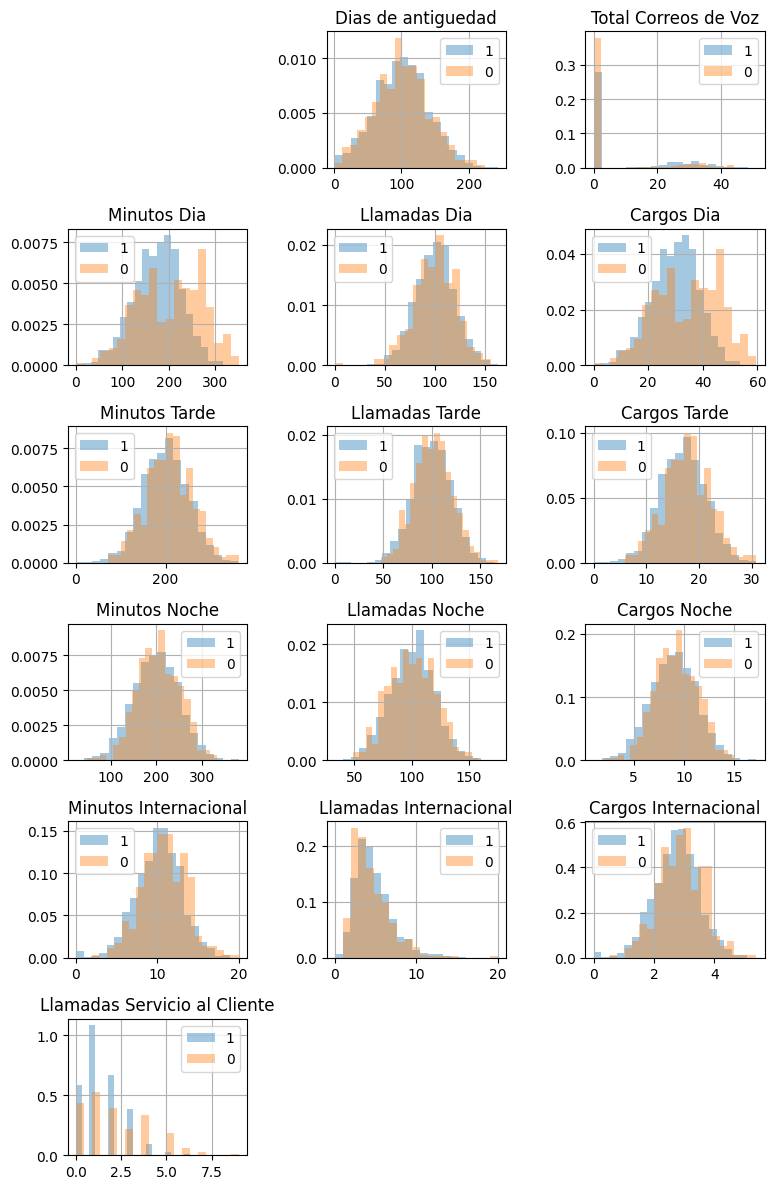

In [10]:
numericas_cols = df_train.select_dtypes('number').columns

fig, subplot = plt.subplots(nrows=6, ncols=3, figsize=(8, 12))
subplot= subplot.flatten()  # facilita iterar por cada grafica

for i, column in enumerate(numericas_cols[:-1]):
    df_train.groupby('Abandono')[column].hist(alpha=0.4, bins=20, ax=subplot[i+1],
                                        density=True)    # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
    subplot[i+1].set_title(column)
    subplot[i+1].legend(df_train['Abandono'].unique())

plt.tight_layout()
subplot[0].set_visible(False)
subplot[-1].set_visible(False)
subplot[-2].set_visible(False)
plt.show()

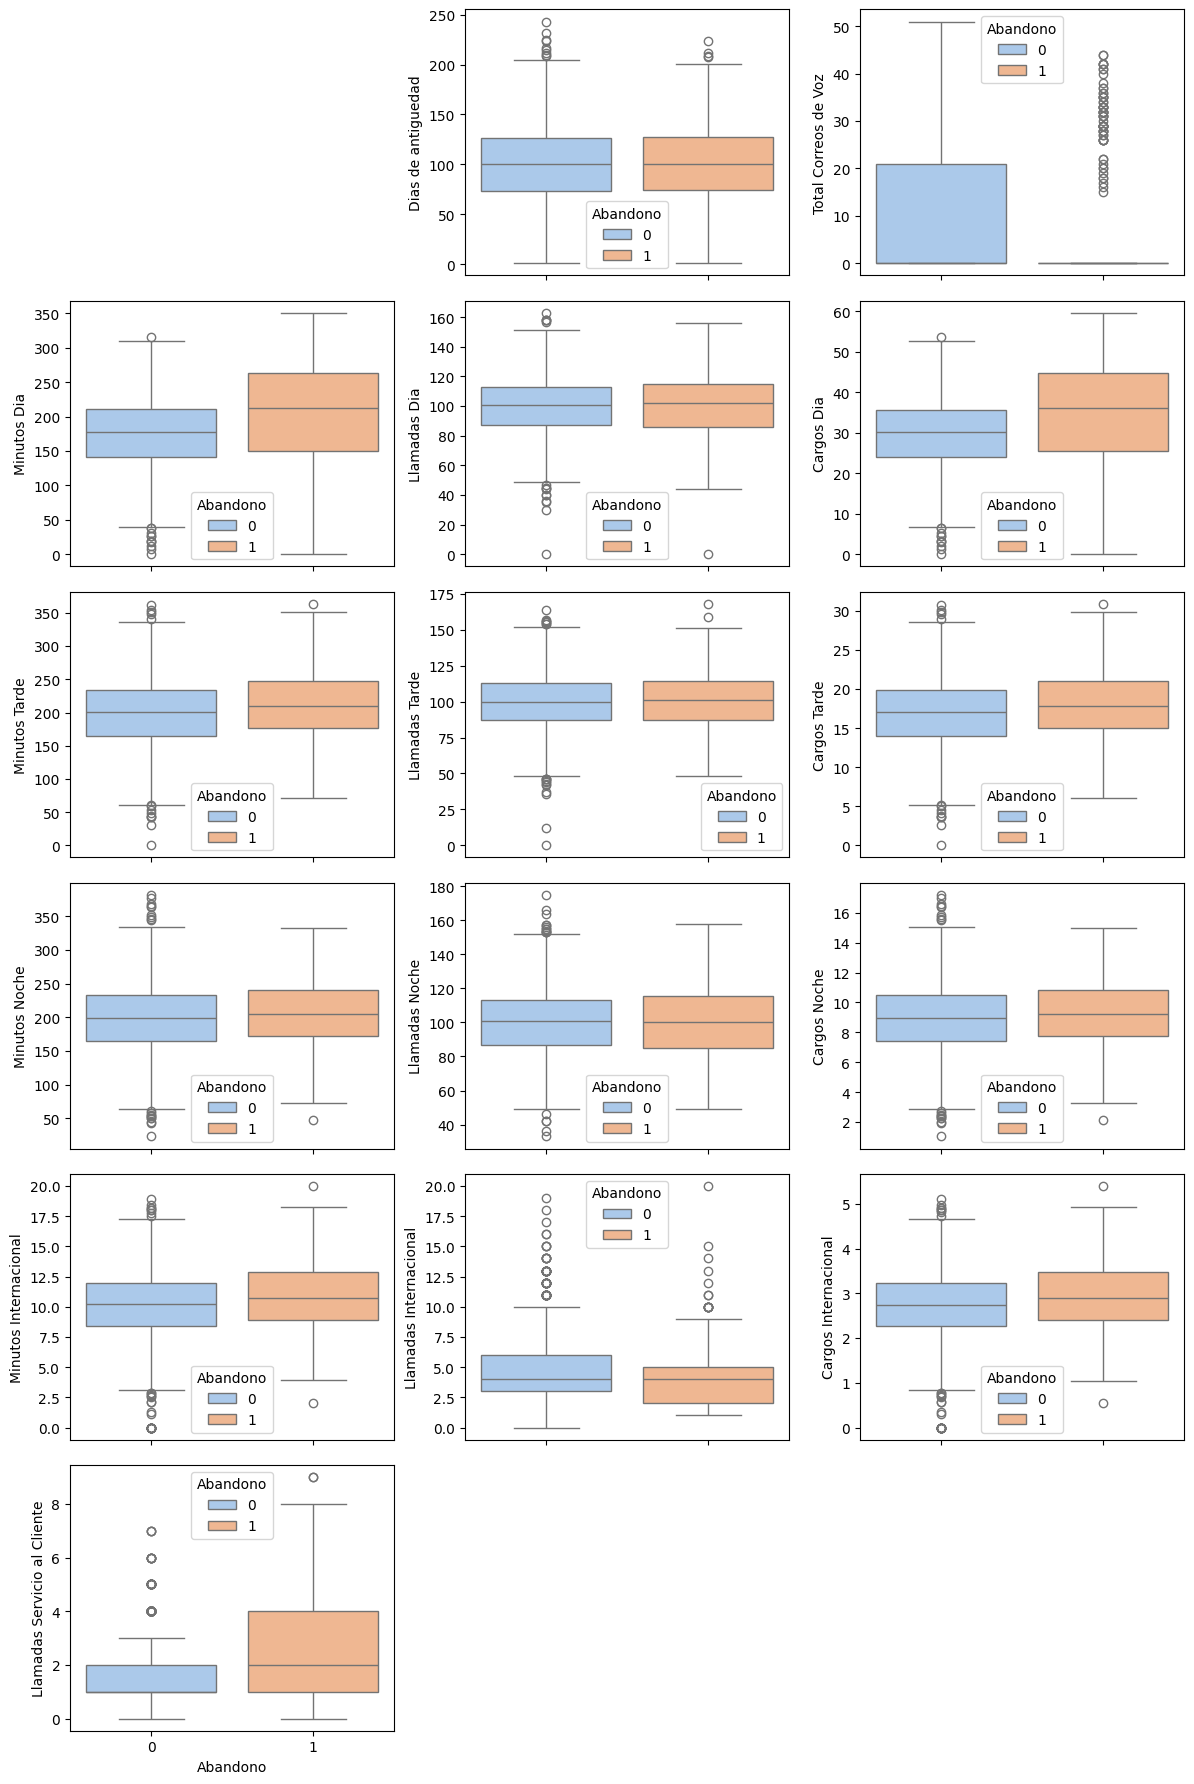

In [11]:
numericas_cols = df_train.select_dtypes('number').columns
fig, subplot = plt.subplots(nrows=6, ncols=3, figsize=(12, 18), sharex=True)
subplot= subplot.flatten()  # facilita iterar por cada grafica

for i, col in enumerate(numericas_cols[:-1]):
    sns.boxplot(y=col, x='Abandono', hue='Abandono', data=df_train,
                orient='v', palette='pastel', ax=subplot[i+1,])   # https://seaborn.pydata.org/generated/seaborn.boxplot.html
plt.tight_layout()
subplot[0].set_visible(False)
subplot[-1].set_visible(False)
subplot[-2].set_visible(False)
plt.show()

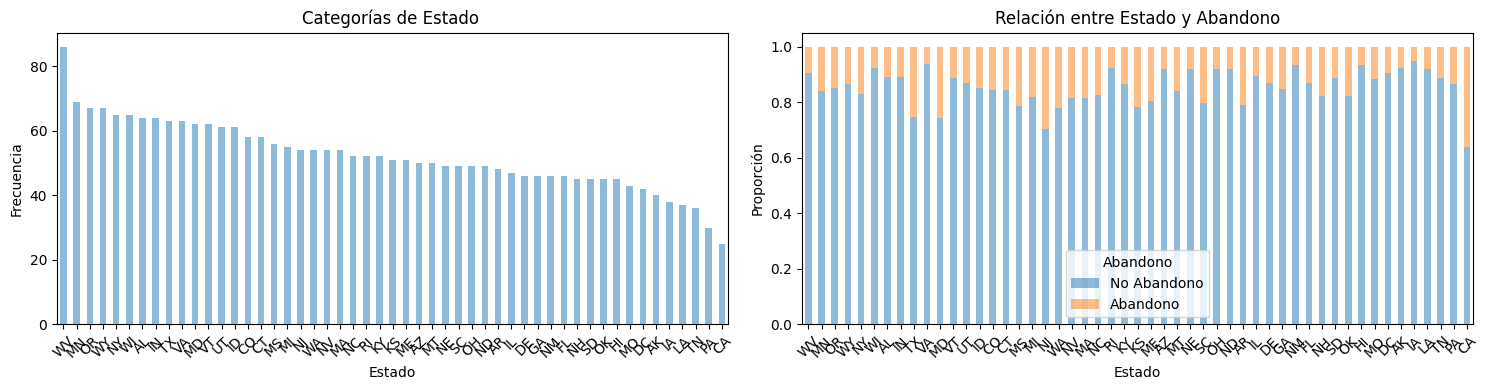

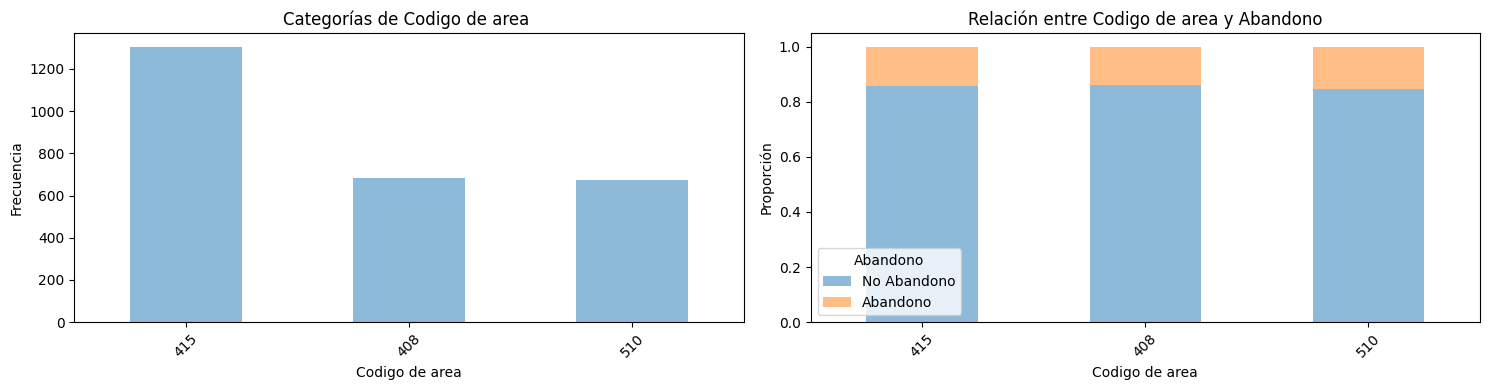

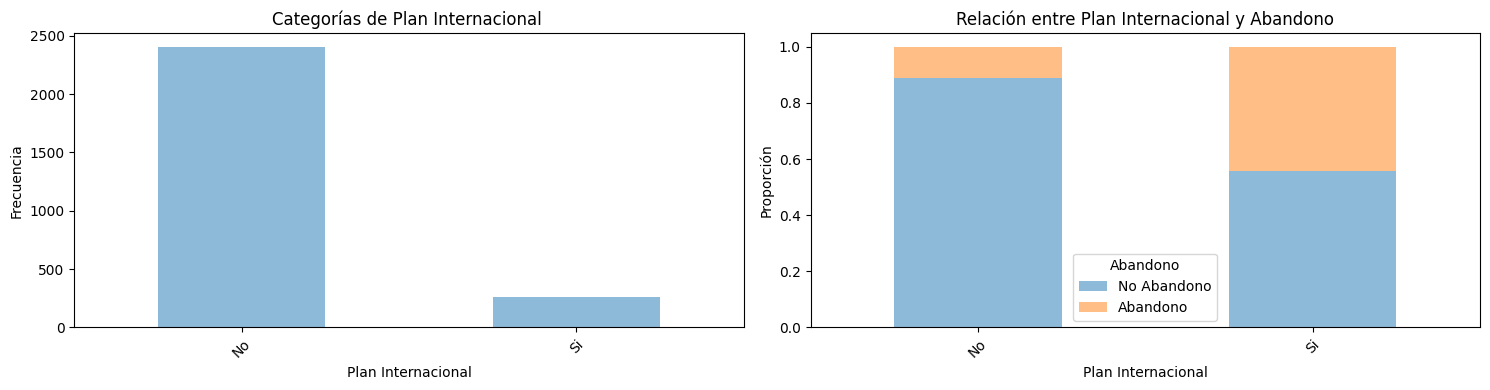

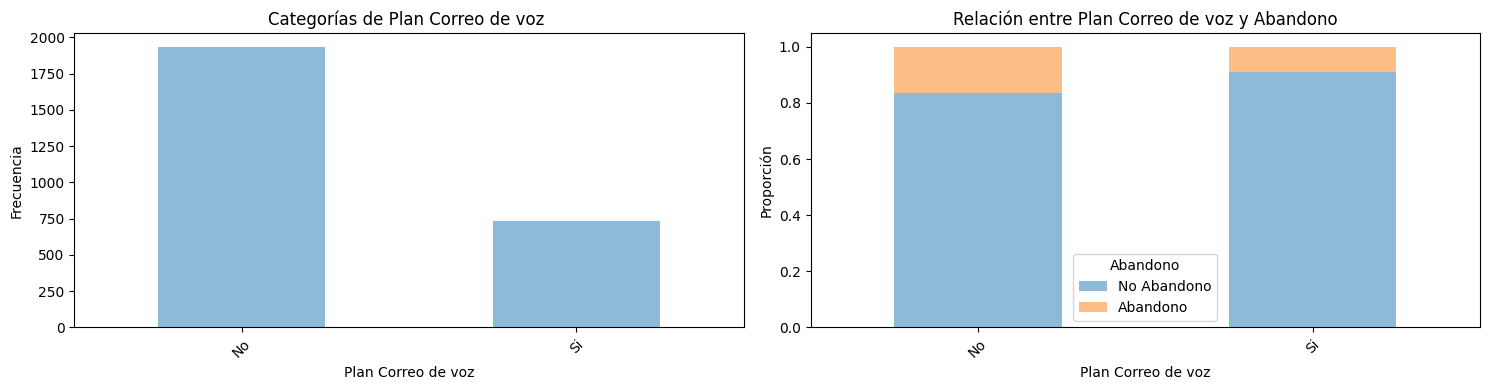

In [12]:
categoricas_cols = df_train.select_dtypes(object).columns

for col in categoricas_cols:
    counts = df_train[col].value_counts()
    order = counts.index.tolist()

    fig, axes = plt.subplots(1, 2, figsize=(15, 4)) # Create a figure with 1 row and 2 columns

    # Gráfico de Frecuencia
    counts.plot(kind='bar', ax=axes[0], alpha=.5)
    axes[0].set_title(f'Categorías de {col} ')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Frecuencia')
    axes[0].tick_params(axis='x', rotation=45)


    # Gráfico de Barras Apilada
    crosstab= pd.crosstab(df_train[col], df_train['Abandono'], normalize ='index')
    crosstab = crosstab.reindex(order, axis=0)

    crosstab.plot(kind='bar', stacked=True, ax=axes[1], alpha=.5)
    axes[1].set_title(f'Relación entre {col} y Abandono')
    axes[1].set_xlabel(col)
    axes[1].set_ylabel('Proporción')
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].legend(title='Abandono', labels=['No Abandono', 'Abandono'])

    plt.tight_layout()
    plt.show()

## Transformación de Variables Categóricas


In [13]:
describe_datos(df_train[categoricas_cols])

,dtypes,null,%null,nunique,unique
Estado,object,0,0.0,51,"[MT, TX, CO, MD, AR, NM, WA, GA, NJ, KS, OH, M..."
Codigo de area,object,0,0.0,3,"[510, 408, 415]"
Plan Internacional,object,0,0.0,2,"[No, Si]"
Plan Correo de voz,object,0,0.0,2,"[Si, No]"



Utilizando one-hot-encoding construimos un "encoder" para transformar las variables categoricas.

In [14]:
encoder = OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False)
encoder.fit(df_train[categoricas_cols]).set_output(transform='pandas')

OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False)

In [15]:
def preprocesar_datos(df_input, encoder, categoricas_cols):
    # Aplicar en encoder(OHE) que aprendió con el conjunto de entrenamiento
    df_cat_encoded = encoder.transform(df_input[categoricas_cols])

    # Remplazar las variables categoricas por las nuevas columnas creadas mediante OHE
    df_final = df_input.drop(columns = categoricas_cols)
    df_final = pd.concat([df_final, df_cat_encoded], axis=1)

    # Separar la etiqueta de las características
    y = df_final['Abandono']
    X = df_final.drop('Abandono', axis=1)
    return X, y


In [16]:

X_train, y_train = preprocesar_datos(df_train, encoder, categoricas_cols)

print(f'Columnas en X_train: {X_train.shape[1]}\n')
for col in X_train.columns:
  print(col)

Columnas en X_train: 71

Dias de antiguedad
Total Correos de Voz
Minutos Dia
Llamadas Dia
Cargos Dia
Minutos Tarde
Llamadas Tarde
Cargos Tarde
Minutos Noche
Llamadas Noche
Cargos Noche
Minutos Internacional
Llamadas Internacional
Cargos Internacional
Llamadas Servicio al Cliente
Estado_AK
Estado_AL
Estado_AR
Estado_AZ
Estado_CA
Estado_CO
Estado_CT
Estado_DC
Estado_DE
Estado_FL
Estado_GA
Estado_HI
Estado_IA
Estado_ID
Estado_IL
Estado_IN
Estado_KS
Estado_KY
Estado_LA
Estado_MA
Estado_MD
Estado_ME
Estado_MI
Estado_MN
Estado_MO
Estado_MS
Estado_MT
Estado_NC
Estado_ND
Estado_NE
Estado_NH
Estado_NJ
Estado_NM
Estado_NV
Estado_NY
Estado_OH
Estado_OK
Estado_OR
Estado_PA
Estado_RI
Estado_SC
Estado_SD
Estado_TN
Estado_TX
Estado_UT
Estado_VA
Estado_VT
Estado_WA
Estado_WI
Estado_WV
Estado_WY
Codigo de area_408
Codigo de area_415
Codigo de area_510
Plan Internacional_Si
Plan Correo de voz_Si


# 4.Entrenamiento del árbol de decisión

In [17]:
profundidad = None

# Entrenamiento del modelo.
clasificador = DecisionTreeClassifier(max_depth=profundidad,
                                      criterion="entropy",
                                      random_state=0)
clasificador.fit(X_train, y_train)
print("La profundida del árbol es: {}".format(clasificador.get_depth()))



La profundida del árbol es: 27


# 5.Preparación de los datos de test


In [18]:
X_test, y_test = preprocesar_datos(df_test, encoder, categoricas_cols)
print(X_test.shape[1])
X_test.columns

71


Index(['Dias de antiguedad', 'Total Correos de Voz', 'Minutos Dia',
       'Llamadas Dia', 'Cargos Dia', 'Minutos Tarde', 'Llamadas Tarde',
       'Cargos Tarde', 'Minutos Noche', 'Llamadas Noche', 'Cargos Noche',
       'Minutos Internacional', 'Llamadas Internacional',
       'Cargos Internacional', 'Llamadas Servicio al Cliente', 'Estado_AK',
       'Estado_AL', 'Estado_AR', 'Estado_AZ', 'Estado_CA', 'Estado_CO',
       'Estado_CT', 'Estado_DC', 'Estado_DE', 'Estado_FL', 'Estado_GA',
       'Estado_HI', 'Estado_IA', 'Estado_ID', 'Estado_IL', 'Estado_IN',
       'Estado_KS', 'Estado_KY', 'Estado_LA', 'Estado_MA', 'Estado_MD',
       'Estado_ME', 'Estado_MI', 'Estado_MN', 'Estado_MO', 'Estado_MS',
       'Estado_MT', 'Estado_NC', 'Estado_ND', 'Estado_NE', 'Estado_NH',
       'Estado_NJ', 'Estado_NM', 'Estado_NV', 'Estado_NY', 'Estado_OH',
       'Estado_OK', 'Estado_OR', 'Estado_PA', 'Estado_RI', 'Estado_SC',
       'Estado_SD', 'Estado_TN', 'Estado_TX', 'Estado_UT', 'Estado_VA',
    

# 6.Evaluación del modelo

In [19]:

# Predicción y evaluación sobre el conjunto de entrenamiento.
y_pred_train = clasificador.predict(X_train)
exactitud_train = accuracy_score(y_train, y_pred_train)*100
print("Exactitud conjunto de entrenamiento: {:4.2f}%".format(exactitud_train))

# Predicción y evaluación sobre el conjunto de prueba.
y_pred_test = clasificador.predict(X_test)
exactitud_test = accuracy_score(y_test, y_pred_test)*100
print("Exactitud conjunto de prueba: {:4.2f}%".format(exactitud_test),'\n')

Exactitud conjunto de entrenamiento: 100.00%
Exactitud conjunto de prueba: 92.20% 



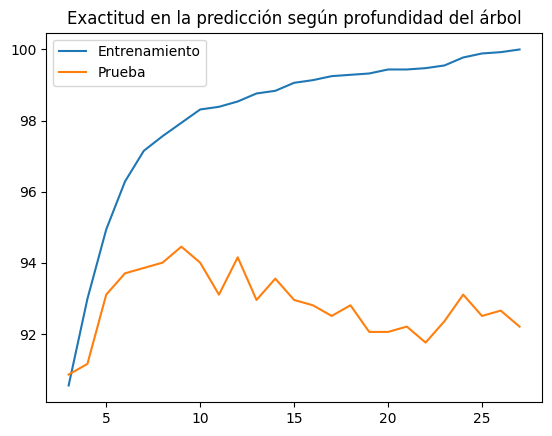

In [21]:
# Entrenamiento y prueba del modelo con distintos niveles de profunidad

clf = {}
y_pred_train = {}
y_pred_test = {}
exactitud_train={}
exactitud_test = {}

for p in range(3,28):
    # Entrenamiento del modelo
    clf[p] = DecisionTreeClassifier(max_depth = p,
                               criterion = "entropy",
                               random_state = 0).fit(X_train, y_train)

    # Predicción y evaluación sobre el conjunto de entrenamiento
    y_pred_train[p] = clf[p].predict(X_train)
    exactitud_train[p] = accuracy_score(y_train, y_pred_train[p])*100

    # Predicción y evaluación sobre el conjunto de prueba
    y_pred_test[p] = clf[p].predict(X_test)
    exactitud_test[p] = accuracy_score(y_test, y_pred_test[p])*100

exactitud_df = pd.DataFrame( {'Entrenamiento':exactitud_train,
                           'Prueba': exactitud_test})

exactitud_df.plot.line(
    title ='Exactitud en la predicción según profundidad del árbol')
plt.show()

In [22]:
exactitud_df

,Entrenamiento,Prueba
3,90.547637,90.854573
4,92.985746,91.154423
5,94.936234,93.103448
6,96.286572,93.703148
7,97.149287,93.853073
8,97.561890,94.002999
9,97.936984,94.452774
10,98.312078,94.002999
11,98.387097,93.103448
12,98.537134,94.152924


In [23]:
profundidad_optima = exactitud_df['Prueba'].idxmax()
profundidad_optima

np.int64(9)

In [24]:
model = clf[profundidad_optima]

## Visualización del árbol de decisión

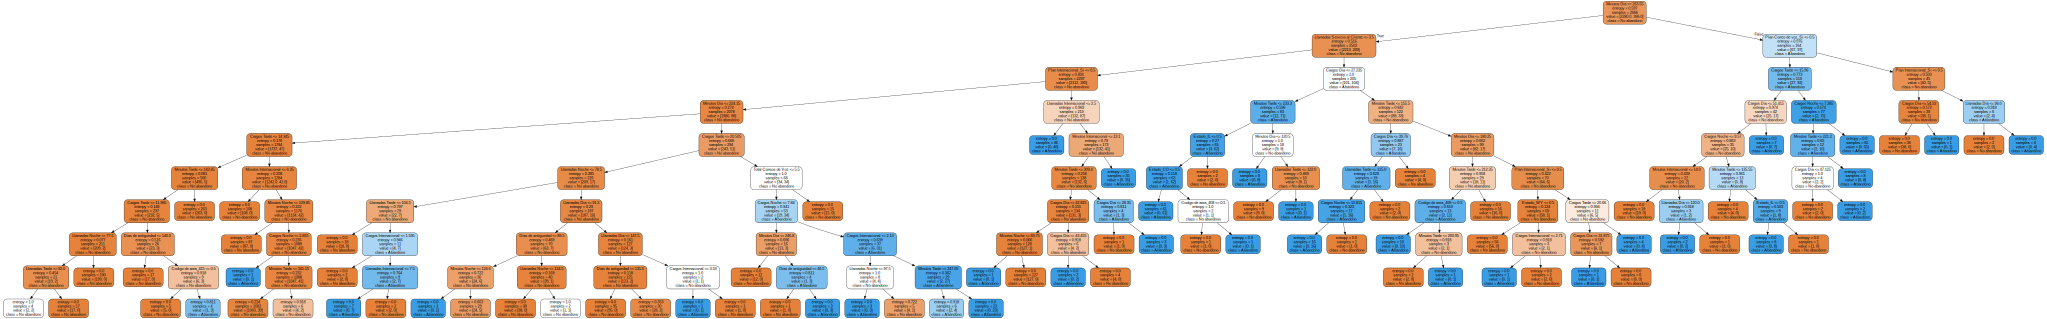

In [27]:
# Exportar el árbol como archivo.dot

dot_data = export_graphviz(clf[9], feature_names=X_train.columns,
                           class_names=['No abandono','Abandono'],
                           max_depth = 9,
                           rounded = True,
                           filled = True,
                           )

graph =  graphviz.Source(dot_data, format='png')

graph.render('arbol_decision')              # guarda el archivo .dot y la gráfica png
graph

In [ ]:
viz_tree = dtreeviz.model(model, X_train, y_train,
                target_name='Abandono',
                feature_names=X_train.columns,
                class_names=['No abandono','Abandono'])

v = viz_tree.view(fontname="monospace", scale=1.2)     # render para guardar en formato
v.save("viz_tree.svg")
v

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


## Importancia de cada variable de acuerdo al modelo

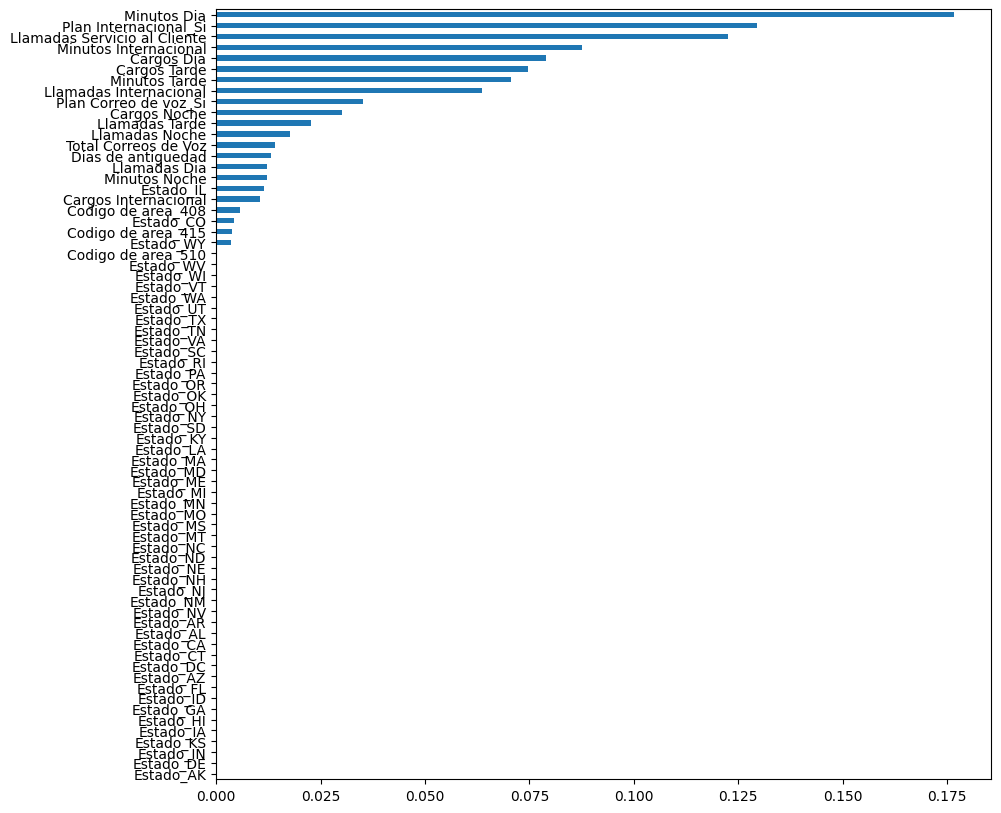

In [29]:
importancia = pd.Series(model.feature_importances_,
                    index=X_train.columns.values)

importancia.sort_values().plot(kind = 'barh',figsize=(10, 10))
plt.show()

## Matriz de confusión y minimización de errores "graves"

**Matriz de confusión**

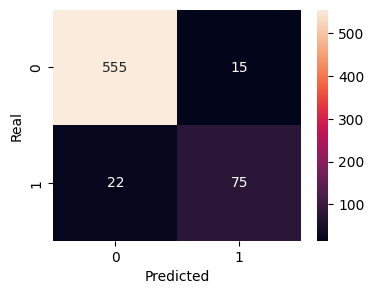

In [ ]:
#Matriz de confusión
data = {'y_Real':y_test, 'y_Prediccion':model.predict(X_test)}

df = pd.DataFrame(data)
confusion_matrix = pd.crosstab(df['y_Real'], df['y_Prediccion'],
                               rownames=['Real'], colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(4,3))
sns.heatmap(confusion_matrix, annot=True, fmt='g')
plt.show()

In [30]:
model.predict(X_test)[0:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [31]:
pd.DataFrame(model.predict_proba(X_test), columns=['No Abandono', 'Abandono']).sort_values('Abandono')

,No Abandono,Abandono
656,1.0,0.0
655,1.0,0.0
651,1.0,0.0
650,1.0,0.0
649,1.0,0.0
...,...,...
560,0.0,1.0
559,0.0,1.0
336,0.0,1.0
193,0.0,1.0


In [32]:
umbral = 0.15 # por arriba del cual se clasificaría como clase 1
prediccion_test = np.where( model.predict_proba(X_test)[:, 1] > umbral, 'Abandono', 'No Abandono')
prediccion_test[0:20]

array(['No Abandono', 'No Abandono', 'No Abandono', 'No Abandono',
       'No Abandono', 'No Abandono', 'No Abandono', 'No Abandono',
       'No Abandono', 'No Abandono', 'No Abandono', 'No Abandono',
       'No Abandono', 'No Abandono', 'No Abandono', 'Abandono',
       'No Abandono', 'No Abandono', 'Abandono', 'No Abandono'],
      dtype='<U11')

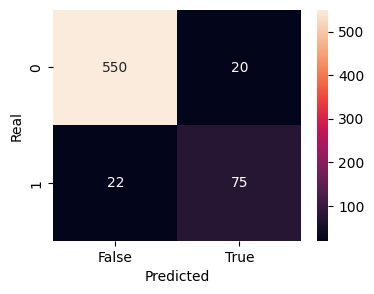

In [33]:
umbral = 0.12 # por arriba del cual se clasificaría como clase 1
prediccion_test = np.where( model.predict_proba(X_test)[:, 1] > umbral, True, False)
data = {'y_Real':  y_test,
        'y_Prediccion': prediccion_test
        }

evaluacion_df = pd.DataFrame(data)
confusion_matrix = pd.crosstab(evaluacion_df['y_Real'], evaluacion_df['y_Prediccion'], rownames=['Real'], colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(4,3))
sns.heatmap(confusion_matrix, annot=True, fmt='g')
plt.show()

In [35]:
from sklearn.metrics import RocCurveDisplay

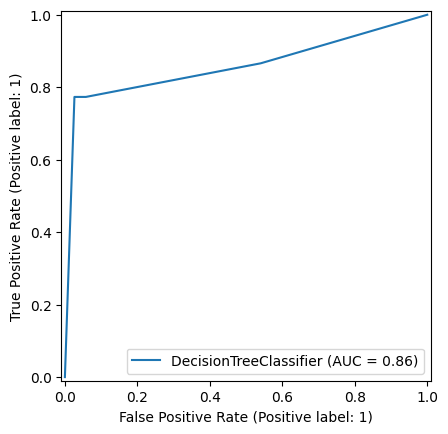

In [36]:
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.show()

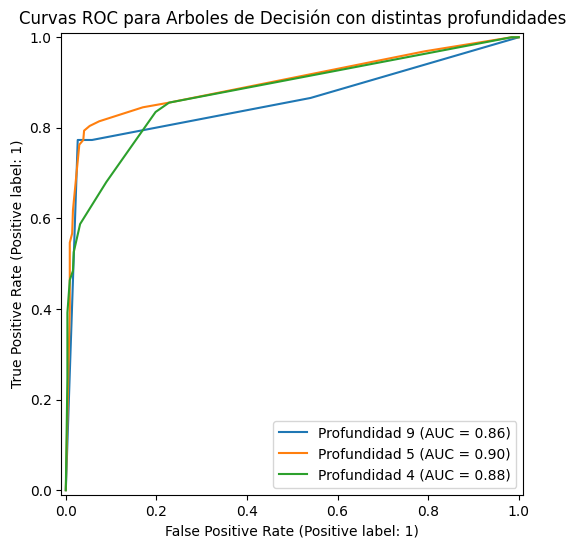

In [37]:

fig, ax = plt.subplots(figsize=(6, 6))

RocCurveDisplay.from_estimator(model, X_test, y_test, name='Profundidad 9', ax=ax)

RocCurveDisplay.from_estimator(clf[5], X_test, y_test, name='Profundidad 5', ax=ax)

RocCurveDisplay.from_estimator(clf[4], X_test, y_test, name='Profundidad 4', ax=ax)

ax.set_title('Curvas ROC para Arboles de Decisión con distintas profundidades')

plt.show()

# Bosque Aleatorio

## Entrenamiento y prueba


In [38]:
clf_rf = RandomForestClassifier(n_estimators=1000,  random_state =0,
                                criterion='entropy').fit(X_train, y_train)

y_train_pred = clf_rf.predict(X_train)
y_pred = clf_rf.predict(X_test)
print("Exactitud del modelo Bosque Aleatorio en el conjunto de entrenamiento: {:4.2f}%".format(accuracy_score(y_train, y_train_pred )*100))
print("Exactitud del modelo Bosque Aleatorio en el conjunto de prueba: {:4.2f}%".format(accuracy_score(y_test, y_pred)*100))


Exactitud del modelo Bosque Aleatorio en el conjunto de entrenamiento: 100.00%
Exactitud del modelo Bosque Aleatorio en el conjunto de prueba: 94.45%


<Axes: >

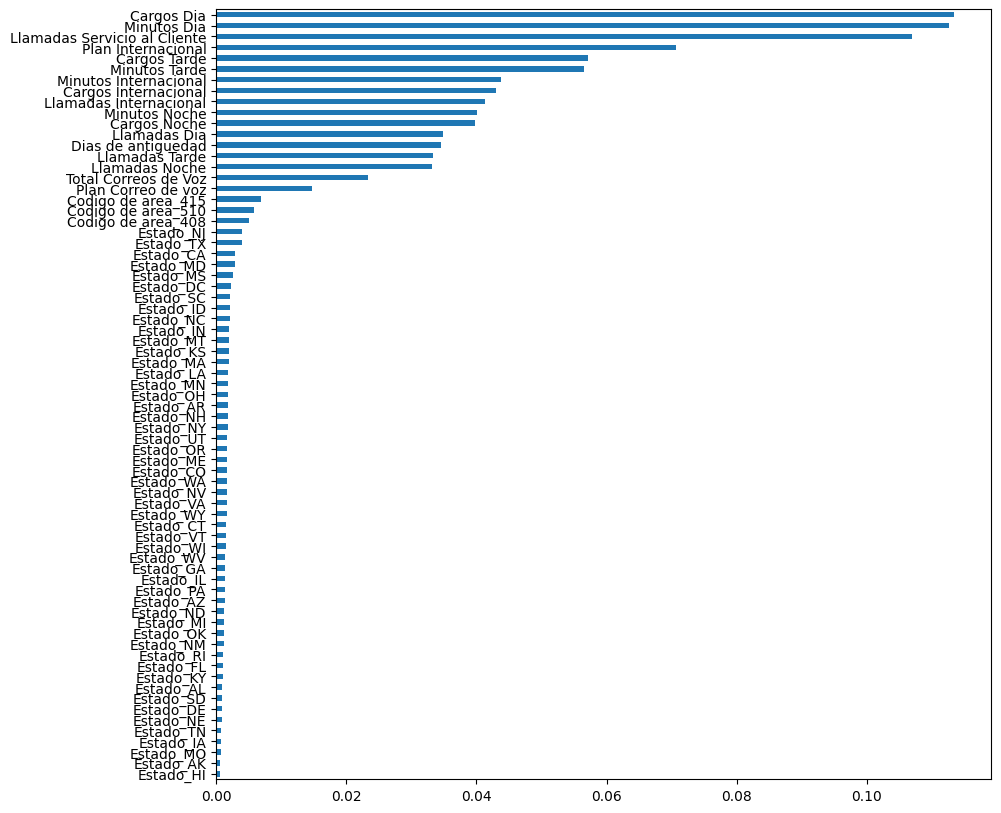

In [ ]:
importances = clf_rf.feature_importances_
weights = pd.Series(importances,
                    index=X.columns.values)
weights.sort_values().plot(kind = 'barh',figsize=(10, 10))

In [39]:
pd.DataFrame(clf_rf.predict_proba(X_test),
             columns=['No Abandono', 'Abandono']).sort_values('Abandono')

,No Abandono,Abandono
442,0.993,0.007
222,0.993,0.007
95,0.993,0.007
412,0.990,0.010
457,0.990,0.010
...,...,...
98,0.100,0.900
433,0.100,0.900
109,0.094,0.906
223,0.083,0.917


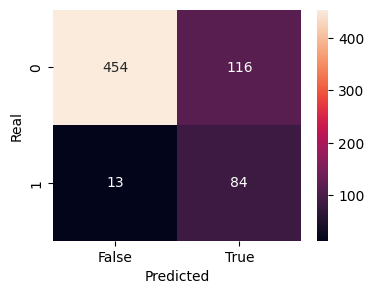

In [ ]:
umbral = 0.10 # por arriba del cual se clasificaría como clase 1
prediccion_test = np.where( clf_rf.predict_proba(X_test)[:, 1] > umbral, True, False)
data = {'y_Real':  y_test,
        'y_Prediccion': prediccion_test
        }

evaluacion_df = pd.DataFrame(data)
confusion_matrix = pd.crosstab(evaluacion_df['y_Real'], evaluacion_df['y_Prediccion'], rownames=['Real'], colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(4,3))
sns.heatmap(confusion_matrix, annot=True, fmt='g')
plt.show()

# Recursos:

Sayash, Kapoor, y Narayanan Arvind. «Leakage and the reproducibility crisis n machine-learning-based science». Patterns 4, n.º 9 (2023). https://doi.org/10.1016/j.patter.2023.100804.
